# Predicting Medical Insurance Cost using ML and XAi



### Date:

Predictive modeling in the healthcare sector remains a vibrant area of actuarial research, driven by the growing interest of insurance companies in harnessing the power of Machine Learning (ML) to enhance their operational efficiency and productivity.

In this study, we employed three ensemble ML models with a foundation in decision trees, including the highly effective Extreme Gradient Boosting (XGBoost), Gradient-boosting Machine (GBM), and Random Forest (RF) techniques, to predict medical insurance costs.

Furthermore, we utilized Explainable Artificial Intelligence (XAI) techniques, particularly the SHapley Additive exPlanations (SHAP) and Individual Conditional Expectation (ICE) plots, to uncover and elucidate the pivotal factors that influence the pricing of medical insurance premiums within the dataset.

The dataset used comprised 986 records and is [publicly available in the KAGGLE repository](https://www.kaggle.com/datasets/tejashvi14/medical-insurance-premium-prediction).

The models were evaluated using four performance evaluation metrics, including:
* R-squared (R2),
* Mean Absolute Error (MAE),
* Root Mean Squared Error (RMSE), and
* Mean Absolute Percentage Error (MAPE).

# Import relevant packages

In [333]:
import pandas as pd
import shap



pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
import warnings  as ws
ws.filterwarnings("ignore")

import sklearn.metrics as metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, SGDRegressor, ElasticNet
from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score

from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import residuals_plot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import PartialDependenceDisplay


# Loading the Data

In [334]:
df = pd.read_csv("Medicalpremium.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [335]:
df.shape

(986, 11)

In [336]:
df.duplicated().sum()

0

In [337]:
df.drop_duplicates(inplace=True)
df.duplicated(keep=False)
df.shape

(986, 11)

In [338]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [339]:
df.shape

(986, 11)

# EDA on the Data

In [340]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.000,41.745,13.963,18.000,30.000,42.000,53.000,66.000
Diabetes,986.000,0.420,0.494,0.000,0.000,0.000,1.000,1.000
BloodPressureProblems,986.000,0.469,0.499,0.000,0.000,0.000,1.000,1.000
AnyTransplants,986.000,0.056,0.230,0.000,0.000,0.000,0.000,1.000
AnyChronicDiseases,986.000,0.181,0.385,0.000,0.000,0.000,0.000,1.000
Height,986.000,168.183,10.098,145.000,161.000,168.000,176.000,188.000
Weight,986.000,76.950,14.265,51.000,67.000,75.000,87.000,132.000
KnownAllergies,986.000,0.215,0.411,0.000,0.000,0.000,0.000,1.000
HistoryOfCancerInFamily,986.000,0.118,0.322,0.000,0.000,0.000,0.000,1.000
NumberOfMajorSurgeries,986.000,0.667,0.749,0.000,0.000,1.000,1.000,3.000


In [341]:
cols = df.columns
cols

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [342]:
pr_lab=['Low','Basic','Average','High','SuperHigh']
df['PremiumLabel']=pr_bins=pd.cut(df['PremiumPrice'],bins=5,labels=pr_lab,precision=0)

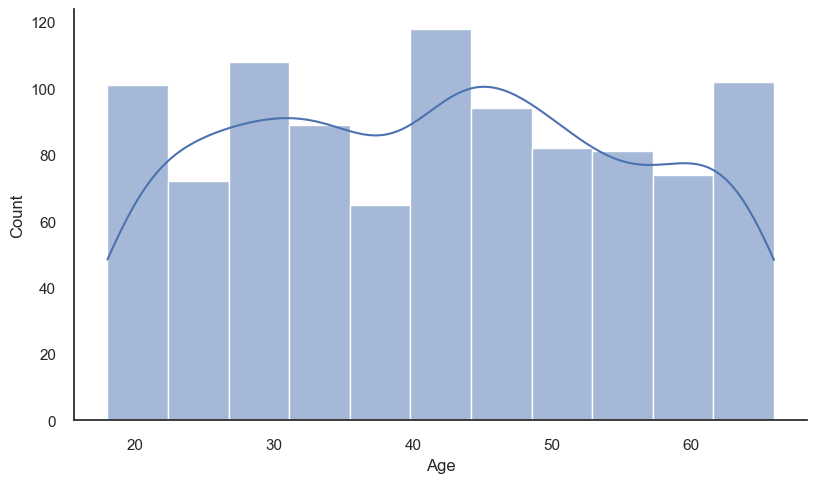

In [343]:
sns.displot(x='Age',data=df,aspect=10/6,kde=True)

Text(0.5, 1.0, 'Insurance Premium Price by Age')

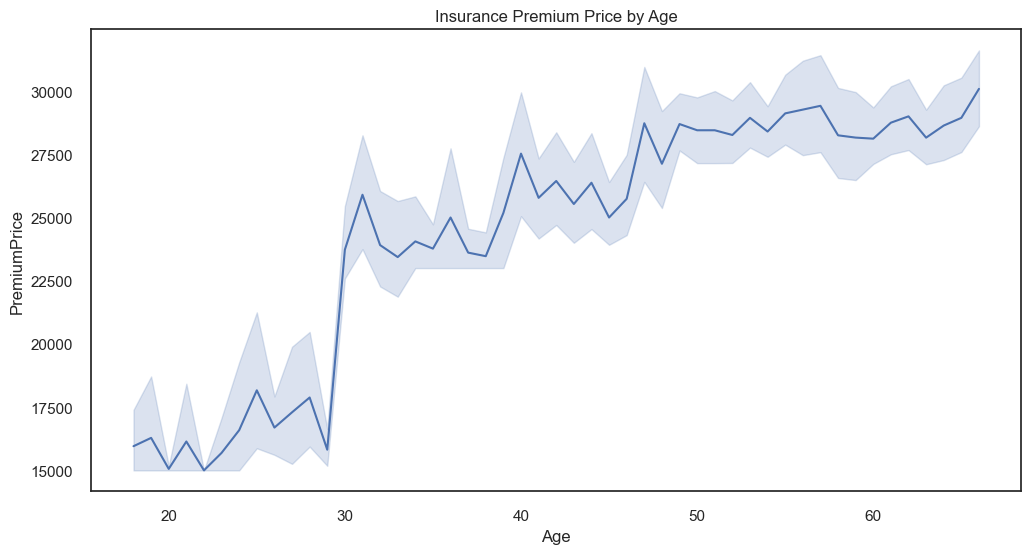

In [344]:
fig,ax=plt.subplots(figsize=(12,6))
sns.lineplot(x=df.Age,y=df.PremiumPrice).set_title('Insurance Premium Price by Age')

Text(0.5, 1.0, 'Distribution of the Insurance Premium Price')

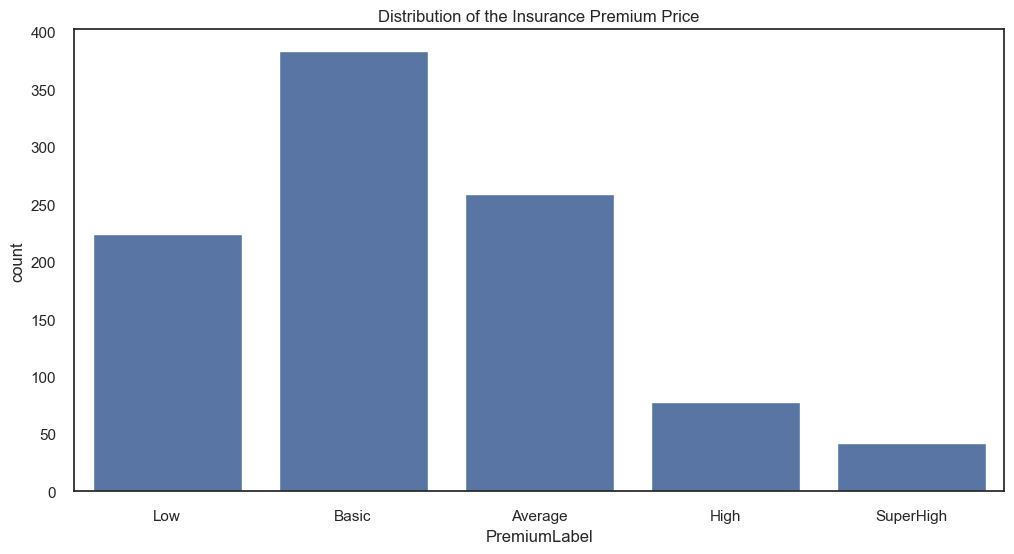

In [345]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='PremiumLabel', data=df,ax=ax).set_title('Distribution of the Insurance Premium Price')

In [346]:
df.groupby(['PremiumLabel','NumberOfMajorSurgeries'])['NumberOfMajorSurgeries'].count()

PremiumLabel  NumberOfMajorSurgeries
Low           0                         142
              1                          82
              2                           0
              3                           0
Basic         0                         226
              1                         156
              2                           1
              3                           0
Average       0                          67
              1                          59
              2                         117
              3                          16
High          0                          22
              1                          56
              2                           0
              3                           0
SuperHigh     0                          22
              1                          19
              2                           1
              3                           0
Name: NumberOfMajorSurgeries, dtype: int64

In [347]:
cols

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

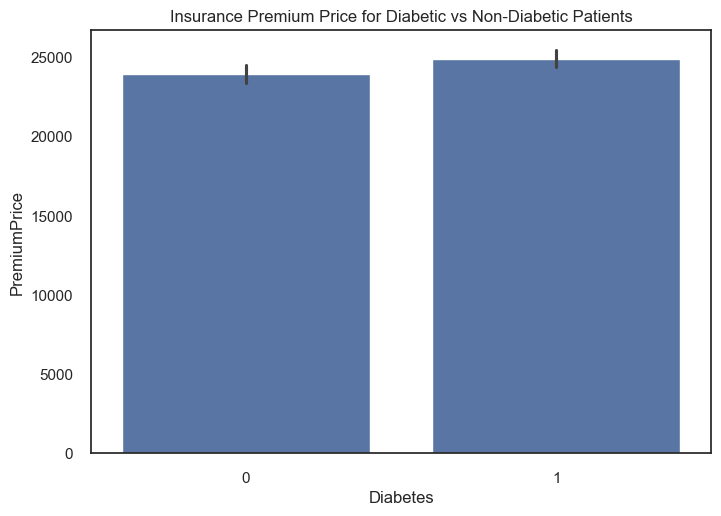

In [348]:
plot = sns.barplot(data=df, x="Diabetes", y= "PremiumPrice" ).set_title('Insurance Premium Price for Diabetic vs Non-Diabetic Patients')

Text(0.5, 0.98, 'Density plot for Diabetic vs Non-Diabetic Patients')

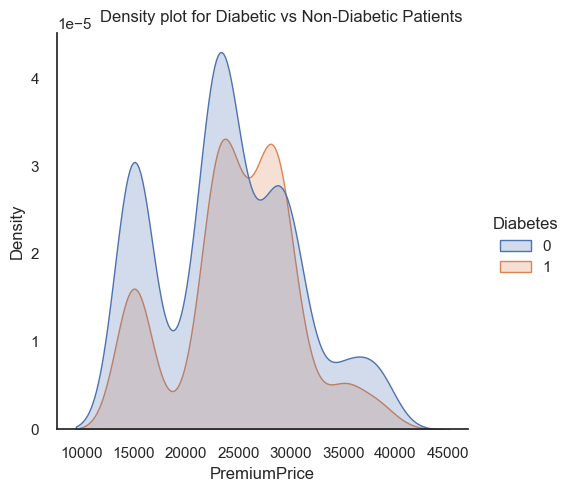

In [349]:
plot= sns.displot(df, x="PremiumPrice", hue="Diabetes", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Diabetic vs Non-Diabetic Patients',
                  fontsize=12, fontdict={"weight": "bold"})

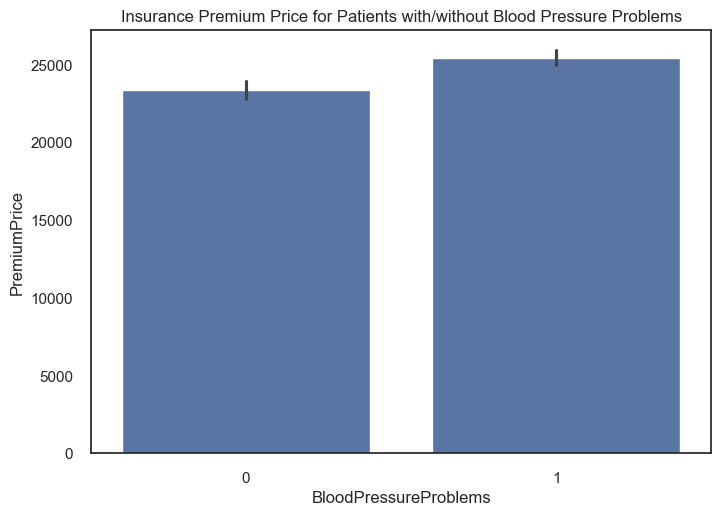

In [350]:
plot = sns.barplot(data=df, x="BloodPressureProblems", y= "PremiumPrice" ).set_title('Insurance Premium Price for Patients with/without Blood Pressure Problems')


Text(0.5, 0.98, 'Density plot for Patients with/without Blood Pressure Problems')

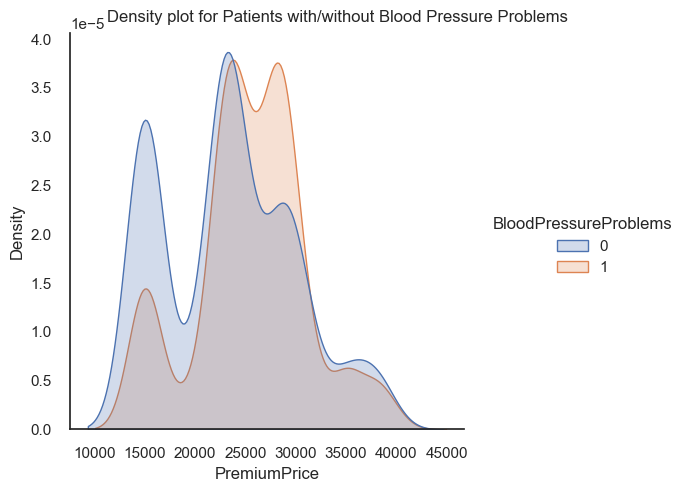

In [351]:
plot= sns.displot(df, x="PremiumPrice", hue="BloodPressureProblems", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Patients with/without Blood Pressure Problems',
                  fontsize=12, fontdict={"weight": "bold"})

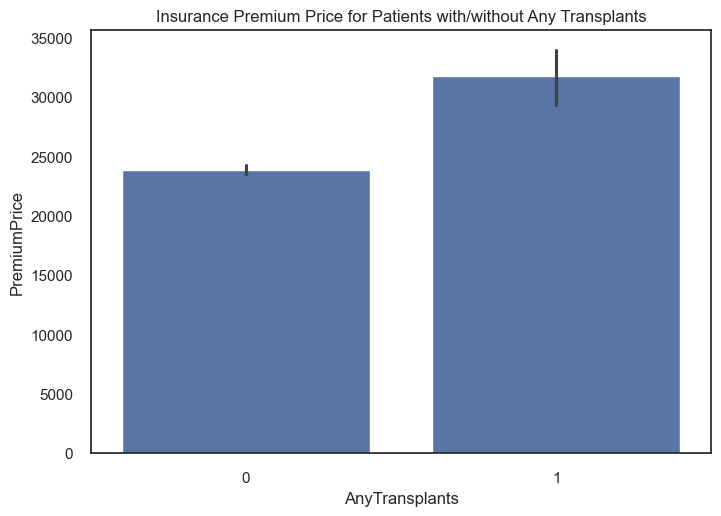

In [352]:
plot = sns.barplot(data=df, x="AnyTransplants", y= "PremiumPrice" ).set_title('Insurance Premium Price for Patients with/without Any Transplants')


Text(0.5, 0.98, 'Density plot for Patients with/without Any Transplants')

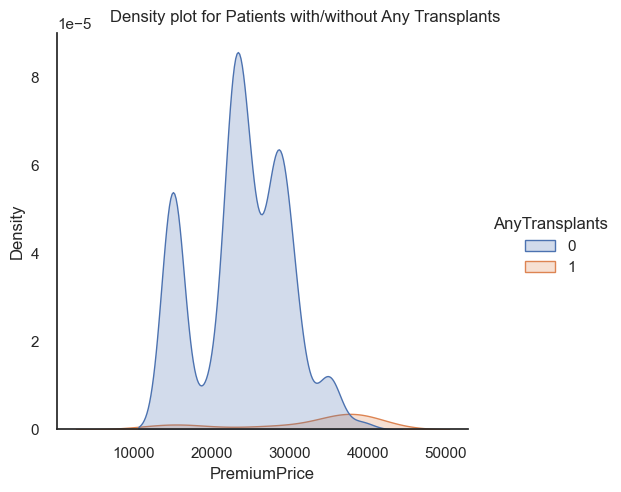

In [353]:
plot= sns.displot(df, x="PremiumPrice", hue="AnyTransplants", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Patients with/without Any Transplants',
                  fontsize=12, fontdict={"weight": "bold"})

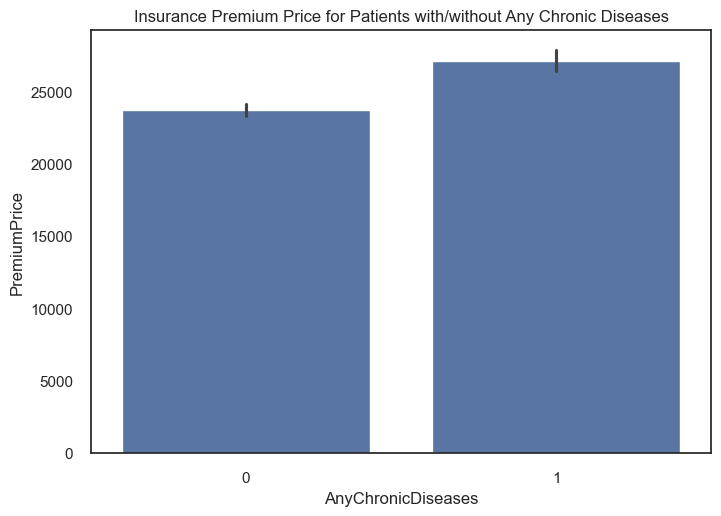

In [354]:
plot = sns.barplot(data=df, x="AnyChronicDiseases", y= "PremiumPrice" ).set_title('Insurance Premium Price for Patients with/without Any Chronic Diseases')

Text(0.5, 0.98, 'Density plot for Patients with/without Any Chronic Diseases')

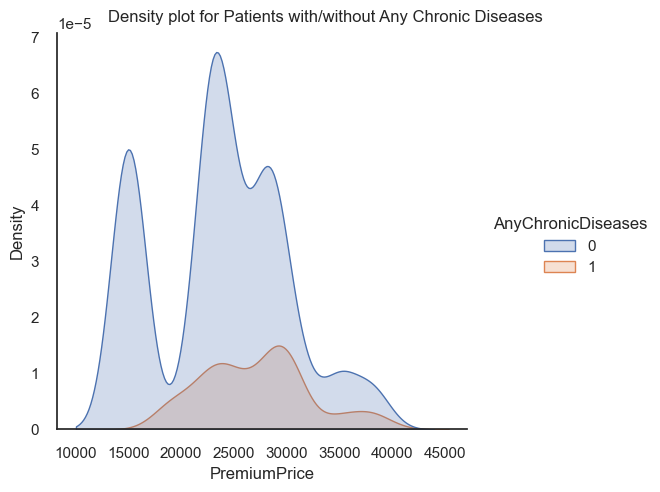

In [355]:
plot= sns.displot(df, x="PremiumPrice", hue="AnyChronicDiseases", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Patients with/without Any Chronic Diseases',
                  fontsize=12, fontdict={"weight": "bold"})

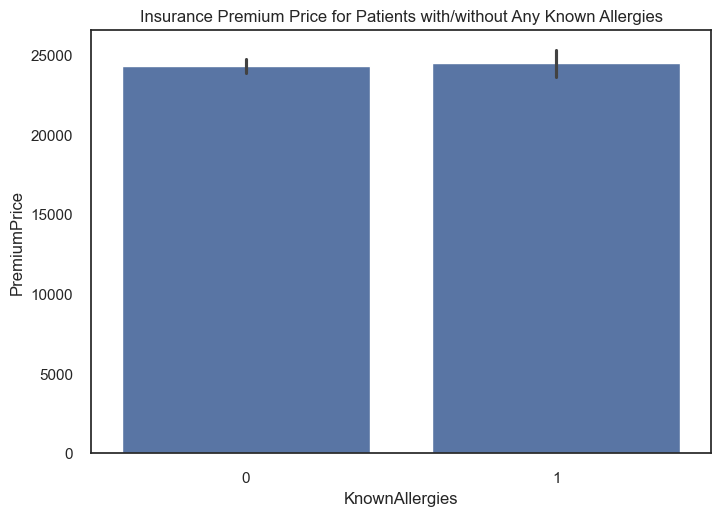

In [356]:
plot = sns.barplot(data=df, x="KnownAllergies", y= "PremiumPrice" ).set_title('Insurance Premium Price for Patients with/without Any Known Allergies')

Text(0.5, 0.98, 'Density plot for Patients with/without Any Known Allergies')

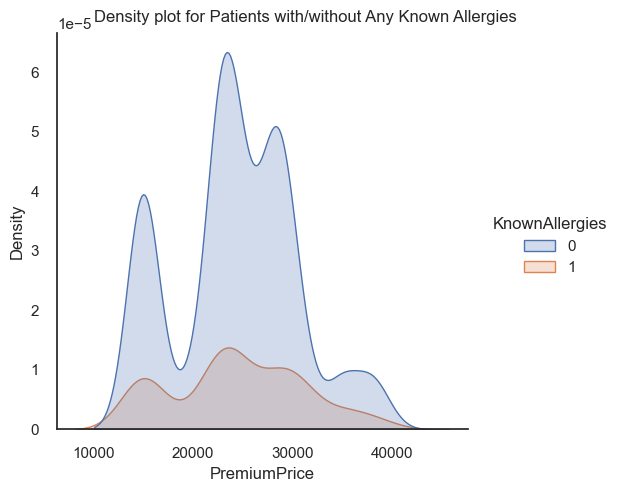

In [357]:
plot= sns.displot(df, x="PremiumPrice", hue="KnownAllergies", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Patients with/without Any Known Allergies',
                  fontsize=12, fontdict={"weight": "bold"})

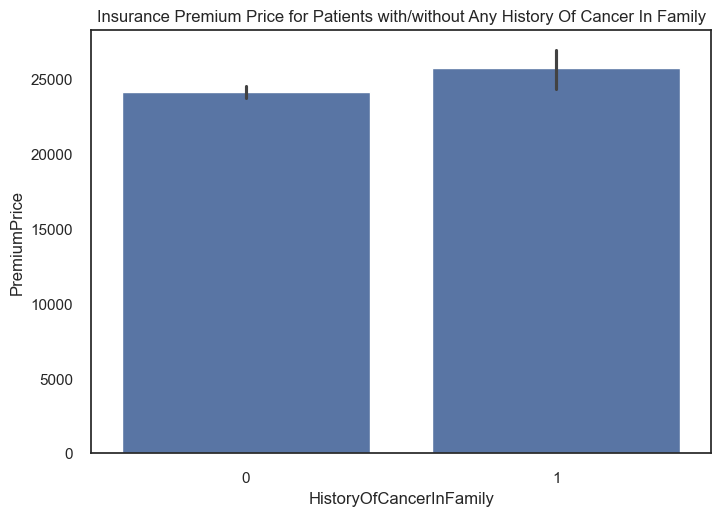

In [358]:
plot = sns.barplot(data=df, x="HistoryOfCancerInFamily", y= "PremiumPrice" ).set_title('Insurance Premium Price for Patients with/without Any History Of Cancer In Family')

Text(0.5, 0.98, 'Density plot for Patients with/without Any History Of Cancer In Family')

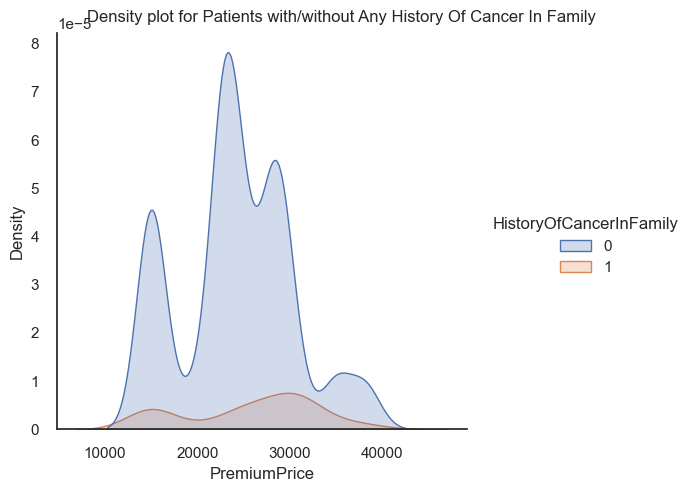

In [359]:
plot= sns.displot(df, x="PremiumPrice", hue="HistoryOfCancerInFamily", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Patients with/without Any History Of Cancer In Family',
                  fontsize=12, fontdict={"weight": "bold"})

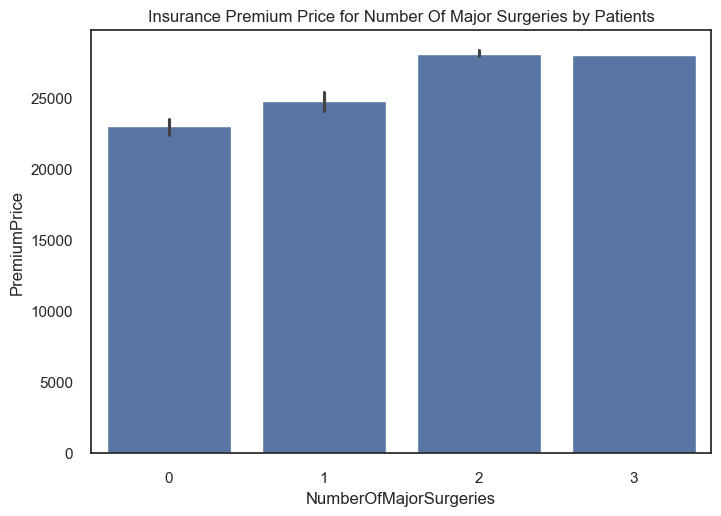

In [360]:
plot = sns.barplot(data=df, x="NumberOfMajorSurgeries", y= "PremiumPrice" ).set_title('Insurance Premium Price for Number Of Major Surgeries by Patients')

Text(0.5, 0.98, 'Density plot for Number Of Major Surgeries by Patients')

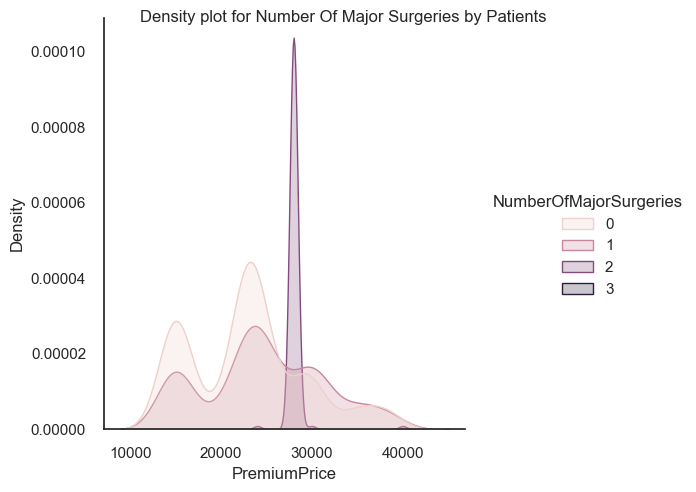

In [361]:
plot= sns.displot(df, x="PremiumPrice", hue="NumberOfMajorSurgeries", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Number Of Major Surgeries by Patients',
                  fontsize=12, fontdict={"weight": "bold"})

In [362]:
# Calculating BMI
w = df['Weight'];
h = df['Height'];

#bmi = 10000*(weight/(height*height));

df['BMI'] = 10000*(w/(h*h))

df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,PremiumLabel,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,Basic,23.725
1,60,1,0,0,0,180,73,0,0,0,29000,Average,22.531
2,36,1,1,0,0,158,59,0,0,1,23000,Basic,23.634
3,52,1,1,0,1,183,93,0,0,2,28000,Average,27.770
4,38,0,0,0,1,166,88,0,0,1,23000,Basic,31.935


In [363]:
df['BMI_Status'] = np.select(
    [df['BMI'] < 18.499999,
     df['BMI'] >= 30,
     df['BMI'].between(18.5, 24.999999),
     df['BMI'].between(25, 29.9999999)],
    ['Underweight', 'Obesse', 'Normal', 'Overweight']
)

In [364]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,PremiumLabel,BMI,BMI_Status
0,45,0,0,0,0,155,57,0,0,0,25000,Basic,23.725,Normal
1,60,1,0,0,0,180,73,0,0,0,29000,Average,22.531,Normal
2,36,1,1,0,0,158,59,0,0,1,23000,Basic,23.634,Normal
3,52,1,1,0,1,183,93,0,0,2,28000,Average,27.770,Overweight
4,38,0,0,0,1,166,88,0,0,1,23000,Basic,31.935,Obesse


In [365]:
df.groupby(['PremiumLabel','BMI_Status'])['BMI_Status'].count()

PremiumLabel  BMI_Status 
Low           Normal          71
              Obesse          70
              Overweight      74
              Underweight      9
Basic         Normal         151
              Obesse          88
              Overweight     120
              Underweight     24
Average       Normal          74
              Obesse          80
              Overweight     100
              Underweight      5
High          Normal          13
              Obesse          49
              Overweight      15
              Underweight      1
SuperHigh     Normal          10
              Obesse          16
              Overweight      16
              Underweight      0
Name: BMI_Status, dtype: int64

<Axes: xlabel='PremiumLabel', ylabel='count'>

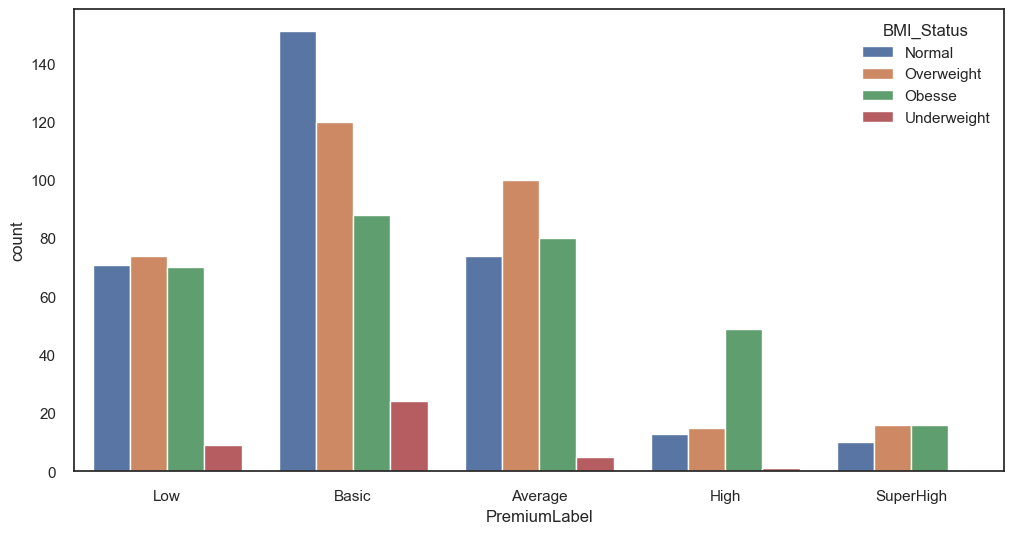

In [366]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='PremiumLabel',hue='BMI_Status', data=df,ax=ax)

Text(0.5, 1.0, 'Insurance Premium Price for Various BMI Status')

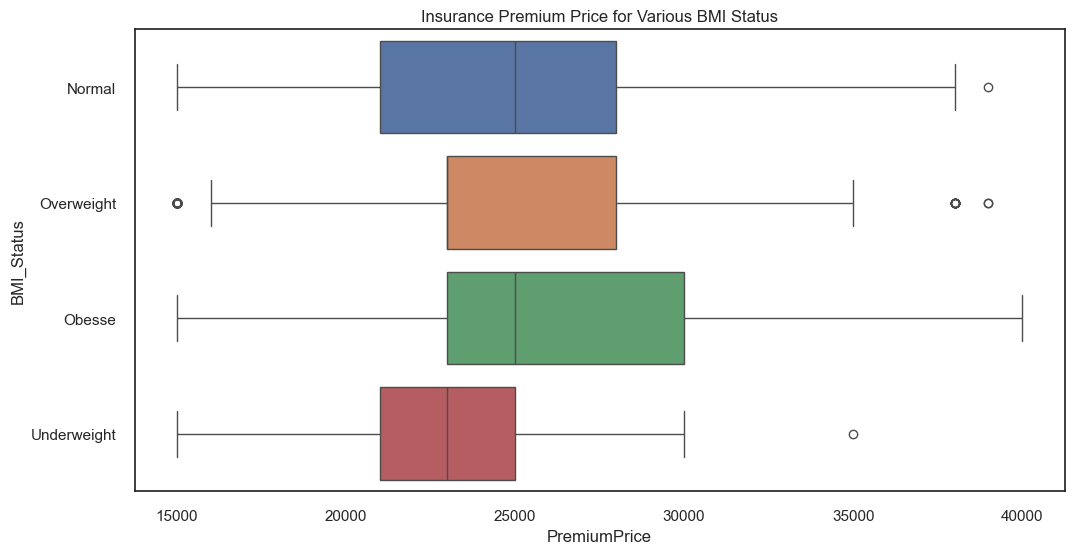

In [367]:
fig,ax=plt.subplots(figsize=(12,6))
sns.boxplot(data=df, x="PremiumPrice", y="BMI_Status", hue="BMI_Status", dodge=False).set_title('Insurance Premium Price for Various BMI Status')

<Axes: >

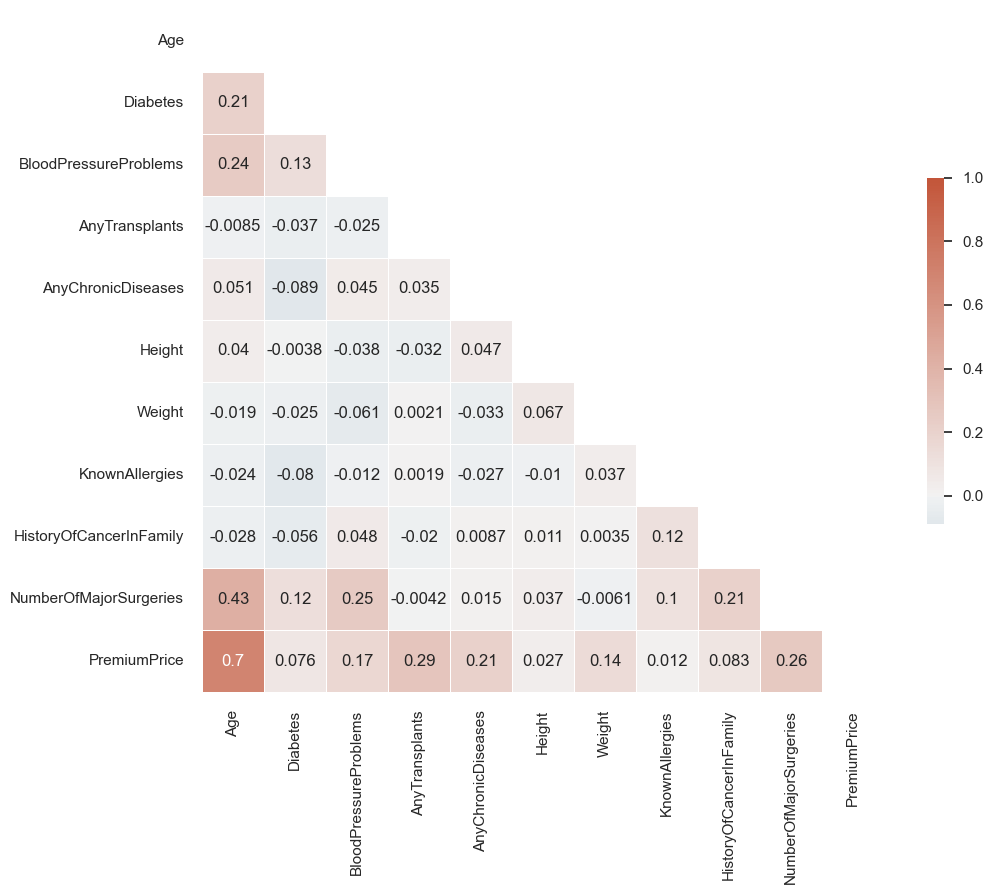

In [368]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = df
d = pd.DataFrame(data=rs,
                 columns=cols)

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [369]:
df=pd.get_dummies(data=df,columns=['BMI_Status'])

In [370]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,PremiumLabel,BMI,BMI_Status_Normal,BMI_Status_Obesse,BMI_Status_Overweight,BMI_Status_Underweight
0,45,0,0,0,0,155,57,0,0,0,25000,Basic,23.725,True,False,False,False
1,60,1,0,0,0,180,73,0,0,0,29000,Average,22.531,True,False,False,False
2,36,1,1,0,0,158,59,0,0,1,23000,Basic,23.634,True,False,False,False
3,52,1,1,0,1,183,93,0,0,2,28000,Average,27.770,False,False,True,False
4,38,0,0,0,1,166,88,0,0,1,23000,Basic,31.935,False,True,False,False


In [371]:
df.shape

(986, 17)

In [372]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'PremiumLabel', 'BMI', 'BMI_Status_Normal', 'BMI_Status_Obesse',
       'BMI_Status_Overweight', 'BMI_Status_Underweight'],
      dtype='object')

# Building the ML model

In [373]:
x=df.drop(['PremiumPrice', 'PremiumLabel', 'Height', 'Weight', 'BMI_Status_Normal', 'BMI_Status_Obesse', 'BMI_Status_Overweight',
       'BMI_Status_Underweight'], axis=1)
y=df['PremiumPrice']

In [374]:
x.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily',
       'NumberOfMajorSurgeries', 'BMI'],
      dtype='object')

### Data normalization

In [375]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xsc=sc.fit_transform(x)

In [376]:
xsc=pd.DataFrame(xsc,columns=x.columns)

In [377]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(xsc,y)
mi_scores = pd.Series(mi_scores, name="MI Scores",index=xsc.columns)
mi_scores = mi_scores.sort_values(ascending=False)
(mi_scores*100).head(15).index

Index(['Age', 'NumberOfMajorSurgeries', 'AnyChronicDiseases', 'AnyTransplants',
       'HistoryOfCancerInFamily', 'BMI', 'KnownAllergies', 'Diabetes',
       'BloodPressureProblems'],
      dtype='object')

In [378]:
fea=list((mi_scores*100).head(15).index)
xsc=xsc[fea]
xsc

,Age,NumberOfMajorSurgeries,AnyChronicDiseases,AnyTransplants,HistoryOfCancerInFamily,BMI,KnownAllergies,Diabetes,BloodPressureProblems
0,0.233,-0.891,-0.469,-0.243,-0.365,-0.636,-0.523,-0.851,-0.939
1,1.308,-0.891,-0.469,-0.243,-0.365,-0.839,-0.523,1.175,-0.939
2,-0.412,0.444,-0.469,-0.243,-0.365,-0.651,-0.523,1.175,1.065
3,0.735,1.780,2.131,-0.243,-0.365,0.053,-0.523,1.175,1.065
4,-0.268,0.444,2.131,-0.243,-0.365,0.761,-0.523,-0.851,-0.939
...,...,...,...,...,...,...,...,...,...
981,-1.701,-0.891,-0.469,-0.243,-0.365,-0.681,-0.523,-0.851,-0.939
982,1.595,3.115,-0.469,-0.243,-0.365,0.416,-0.523,1.175,1.065
983,1.021,0.444,-0.469,-0.243,-0.365,0.356,-0.523,-0.851,1.065
984,0.377,0.444,-0.469,-0.243,-0.365,0.303,1.911,1.175,1.065


In [379]:
y.shape

(986,)

### Split train

In [380]:
#X=df.drop(['PremiumPrice'],axis=1)
#Y=df[['PremiumPrice']]
from sklearn.linear_model import LinearRegression,Lasso

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
    xtrain,xtest,ytrain,ytest=train_test_split(xsc, y, random_state=i, test_size=0.25)
    lrmodel=LinearRegression()
    lrmodel.fit(xtrain,ytrain)
    l1.append(lrmodel.score(xtrain,ytrain))
    l2.append(lrmodel.score(xtest,ytest))
    cvs=(cross_val_score(lrmodel,xsc,y,cv=5,)).mean()
    l3.append(cvs)
    df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
df1


,train acc,test acc,cvs
0,0.637,0.628,0.626
1,0.611,0.709,0.626
2,0.612,0.685,0.626
3,0.619,0.678,0.626
4,0.664,0.539,0.626
5,0.612,0.693,0.626
6,0.624,0.665,0.626
7,0.625,0.663,0.626
8,0.620,0.675,0.626
9,0.675,0.502,0.626


# LR Model

In [381]:
xtrain,xtest,ytrain,ytest=train_test_split(xsc,y,test_size=0.25,random_state=41)
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
print(lrmodel.score(xtrain,ytrain))
print(lrmodel.score(xtest,ytest))
print(cross_val_score(lrmodel,xsc,y,cv=5,).mean())


0.6111971888559355
0.7085652213125866
0.6255626958404495


import os
import pickle

# biến lưu path folder 
save_dir = 'D:\jetbrain\ideProject\PyProject\DACN1'  # path luư mô hình


# biến lưu path folder + tên file
model_file = os.path.join(save_dir, 'LR_model.pkl')

# lưu model
with open(model_file, 'wb') as file:
    pickle.dump(lrmodel, file) # đổi mỗi biến mô hình - tìm biến model ở đoạn model.fit(X,y) (hàm này là này fit dữ liệu)
    print(f"Model saved to: {model_file}")

In [382]:
acc_lr_Train = lrmodel.score(xtrain,ytrain)
print('R^2 Train:', acc_lr_Train)

acc_lr_Test = lrmodel.score(xtest,ytest)
print('R^2 Test:', acc_lr_Test)

acc_lr_CV = cross_val_score(lrmodel,xsc,y,cv=5,).mean()
print('R^2 CV:', acc_lr_CV)



R^2 Train: 0.6111971888559355
R^2 Test: 0.7085652213125866
R^2 CV: 0.6255626958404495


# RF Model

In [383]:
import time
import psutil

# Record the start time
start_time = time.time()
# Function to get memory usage
def get_memory_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    return memory_info.rss / (1024 * 1024)  # Convert to megabytes

# Record memory usage before running your code
start_memory = get_memory_usage()


rfmodel0=RandomForestRegressor(random_state=41)
rfmodel0.fit(xtrain,ytrain)
ypredtrain2=rfmodel0.predict(xtrain)
ypredtest2=rfmodel0.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel0,xsc,y,cv=5,).mean())

from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=41)
param_grid={'n_estimators':[60, 220, 40]}
grid1=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid1.fit(xtrain,ytrain)
print(grid1.best_params_)

rfmodel=grid1
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,xsc,y,cv=5,).mean())



acc_RF_Train = (r2_score(ytrain,ypredtrain2))
print('R^2 Train:', acc_RF_Train)

acc_RF_Test = (r2_score(ytest,ypredtest2))
print('R^2 Test:', acc_RF_Test)

acc_RF_CV = cross_val_score(rfmodel,xsc,y,cv=5,).mean()
print('R^2 CV:', acc_RF_CV)


# other metrics

MAE_RF_Test= metrics.mean_absolute_error(ytest,ypredtest2)
print('MAE:',MAE_RF_Test)
MSE_RF_Test = metrics.mean_squared_error(ytest,ypredtest2)
print('MSE:',MSE_RF_Test)
RMSE_RF_Test = np.sqrt(metrics.mean_squared_error(ytest,ypredtest2))
print('RMSE:', RMSE_RF_Test)
MAPE_RF_Test= (metrics.mean_absolute_percentage_error(ytest,ypredtest2))
print('MAPE:',MAPE_RF_Test)




# Record the end time
end_time = time.time()
# Record memory usage after running your code
end_memory = get_memory_usage()

# Calculate and print the elapsed time
RF_elapsed_time = end_time - start_time

# Calculate and print memory usage
RF_memory_used = end_memory - start_memory


print(f"Elapsed Time: {RF_elapsed_time} seconds")

print(f"Memory Used: {RF_memory_used} MB")

0.9557255461267633
0.8461602251876712
0.7335977529541466
{'n_estimators': 220}
0.9579699162988777
0.8429051214924057
0.7346725984307015
R^2 Train: 0.9579699162988777
R^2 Test: 0.8429051214924057
R^2 CV: 0.7346725984307015
MAE: 1377.6959882223039
MSE: 5781824.873690902
RMSE: 2404.5425497775877
MAPE: 0.058057958695161005
Elapsed Time: 39.98003602027893 seconds
Memory Used: 7.4765625 MB


In [384]:
import os
import pickle

# biến lưu path folder 
save_dir = 'D:\jetbrain\ideProject\PyProject\DACN1'  # path luư mô hình


# biến lưu path folder + tên file
model_file = os.path.join(save_dir, 'RF_model.pkl')

# lưu model
with open(model_file, 'wb') as file:
    pickle.dump(lrmodel, file) # đổi mỗi biến mô hình - tìm biến model ở đoạn model.fit(X,y) (hàm này là này fit dữ liệu)
    print(f"Model saved to: {model_file}")

Model saved to: D:\jetbrain\ideProject\PyProject\DACN1\RF_model.pkl


## Learning Curve for RF model

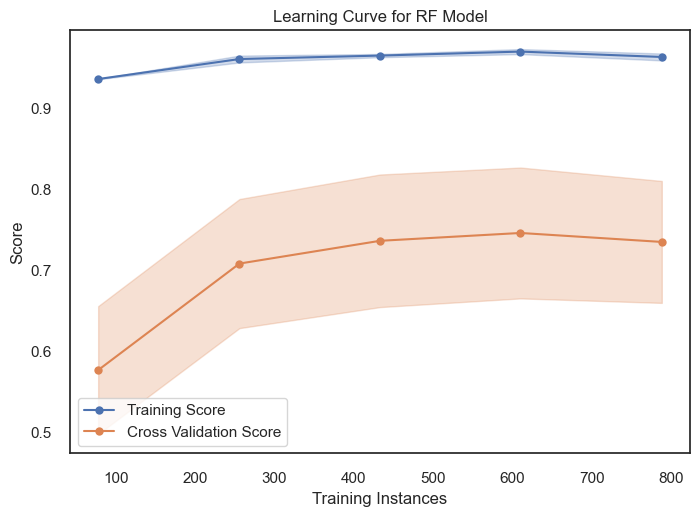

<Axes: title={'center': 'Learning Curve for RF Model'}, xlabel='Training Instances', ylabel='Score'>

In [385]:
from yellowbrick.model_selection import learning_curve


visualizer = learning_curve(rfmodel,xsc,y,cv=5, scoring='r2', title="Learning Curve for RF Model")

visualizer.show()

## Residuals plot + Q-Q plot (yellowbrick) for RF model

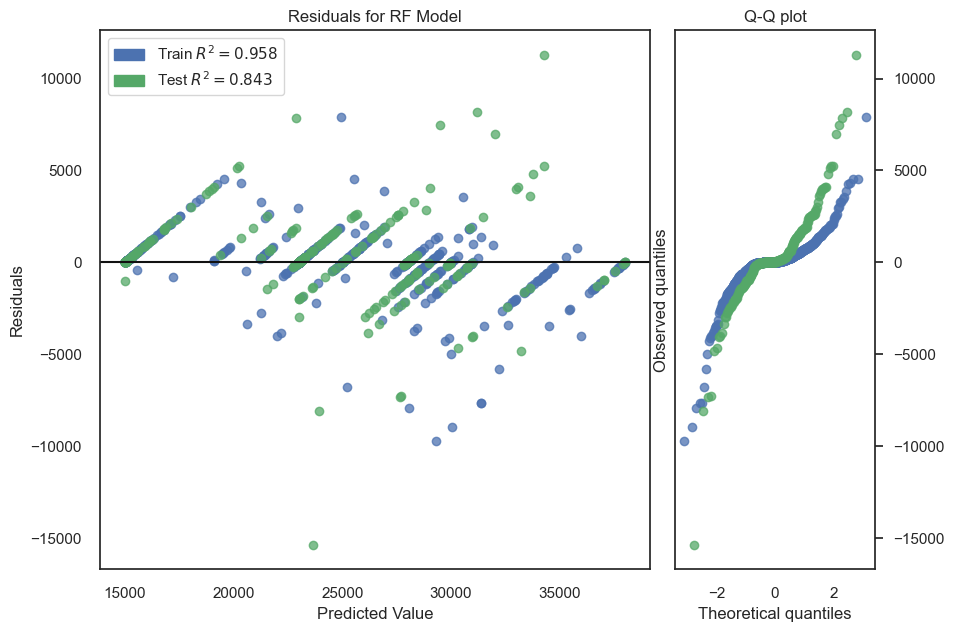

In [386]:
fig, ax = plt.subplots(figsize=(10, 7))
_ = residuals_plot(estimator=rfmodel,
                   is_fitted=True,
                   ax=ax,
                   X_train=xtrain,
                   y_train=ytrain,
                   X_test=xtest,
                   y_test=ytest,
                   hist=False,
                   qqplot=True,
                  title="Residuals for RF Model"
                  )

## Prediction error plot (yellowbrick) for RF model

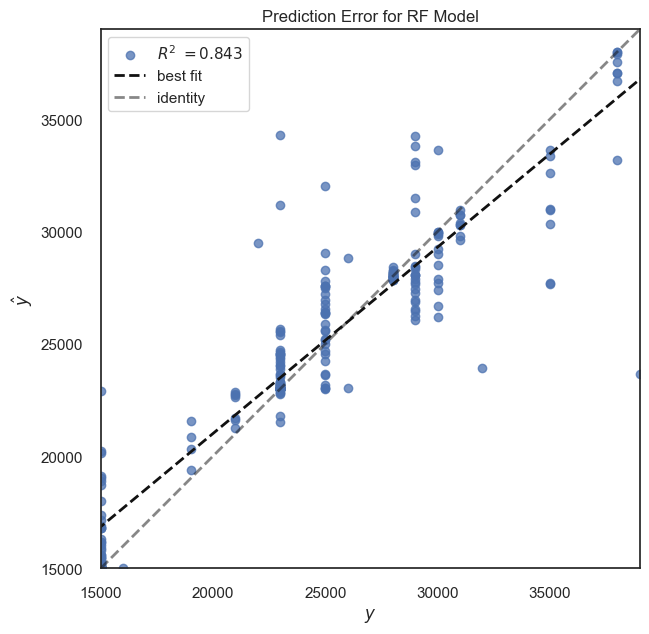

In [387]:
fig, ax = plt.subplots(figsize=(10, 7))
_ = prediction_error(estimator=rfmodel,
                     is_fitted=True,
                     ax=ax,
                     X_train=xtrain,
                     y_train=ytrain,
                     X_test=xtest,
                     y_test=ytest,
                     title="Prediction Error for RF Model")

## SHAP Analysis for RF model

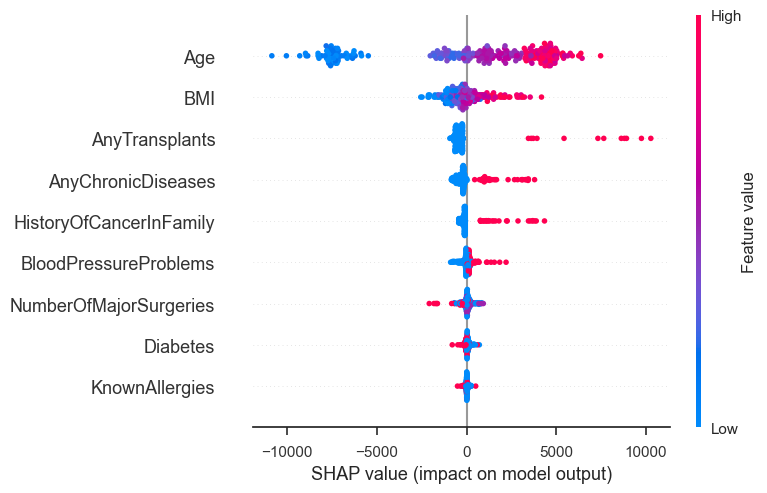

In [388]:
# Shap analysis for RF model

explainer1 = shap.TreeExplainer(rfmodel0)
RF_shap_values = explainer1.shap_values(xtest)
shap.summary_plot(RF_shap_values, xtest)

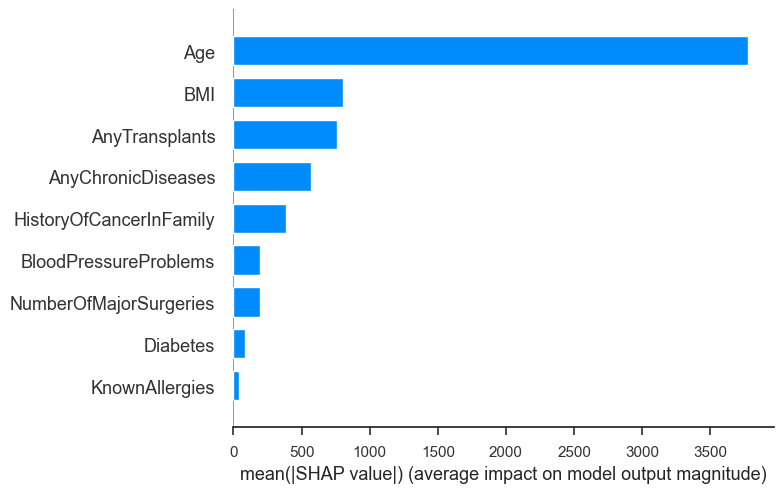

In [389]:
shap.summary_plot(RF_shap_values, xtest, plot_type="bar")

In [390]:
xtest.columns

Index(['Age', 'NumberOfMajorSurgeries', 'AnyChronicDiseases', 'AnyTransplants',
       'HistoryOfCancerInFamily', 'BMI', 'KnownAllergies', 'Diabetes',
       'BloodPressureProblems'],
      dtype='object')

## ICE plot for RF Model

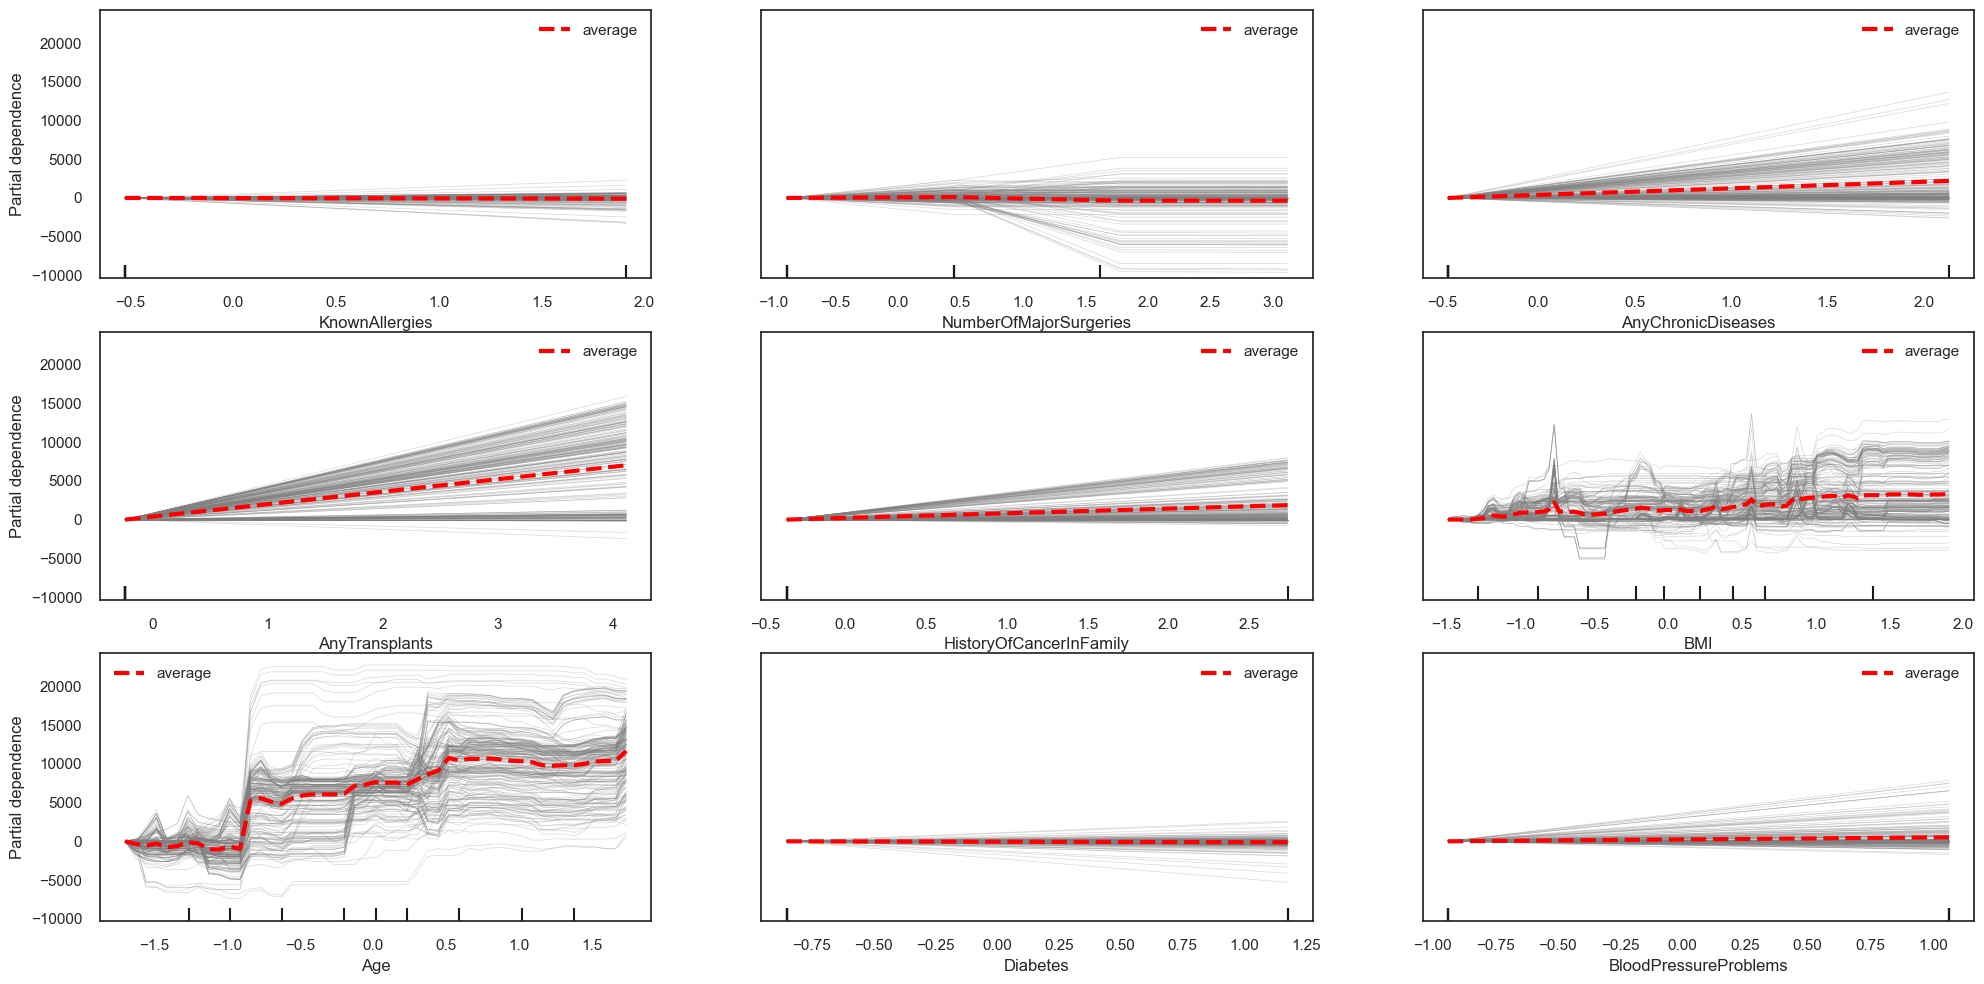

In [391]:
cols = xtest.columns
# Determine the 9 features with highest value for "feature importance" to draw the ICE plots.
included_features_indices = np.argpartition(rfmodel0.feature_importances_, -9)[-9:]

# Plot the ICE plots.
fig, ax = plt.subplots(figsize=(20, 10))
fig.set_tight_layout(True)  # Make sure labels of axes don't overlap in the final figure.
_ = PartialDependenceDisplay.from_estimator(estimator=rfmodel0,
                                            ax=ax,
                                            X=xtest,
                                            features=[i for i in included_features_indices],
                                            feature_names=cols,
                                            n_cols=3,
                                            centered= True,
                                            kind='both',
                                            ice_lines_kw={'color': 'gray'},
                                            pd_line_kw={'color': 'red', 'linewidth': 3, 'linestyle': 'dashed'})

# GBM Model

In [392]:
import time
import psutil

# Record the start time
start_time = time.time()
# Function to get memory usage
def get_memory_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    return memory_info.rss / (1024 * 1024)  # Convert to megabytes

# Record memory usage before running your code
start_memory = get_memory_usage()



gbmodel0=GradientBoostingRegressor()
gbmodel0.fit(xtrain,ytrain)
ypredtrain3=gbmodel0.predict(xtrain)
ypredtest3=gbmodel0.predict(xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel0,xsc,y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50,100],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid2=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid2.fit(xtrain,ytrain)
print(grid2.best_params_)

gbmodel=grid2
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)



acc_GBM_Train = (r2_score(ytrain,ypredtrain3))
print('R^2 Train:', acc_GBM_Train)

acc_GBM_Test = (r2_score(ytest,ypredtest3))
print('R^2 Test:', acc_GBM_Test)

acc_GBM_CV = cross_val_score(gbmodel,xsc,y,cv=5,).mean()
print('R^2 CV:', acc_GBM_CV)


# other metrics

MAE_GBM_Test= metrics.mean_absolute_error(ytest,ypredtest3)
print('MAE:',MAE_GBM_Test)
MSE_GBM_Test = metrics.mean_squared_error(ytest,ypredtest3)
print('MSE:',MSE_GBM_Test)
RMSE_GBM_Test = np.sqrt(metrics.mean_squared_error(ytest,ypredtest3))
print('RMSE:', RMSE_GBM_Test)
MAPE_GBM_Test= (metrics.mean_absolute_percentage_error(ytest,ypredtest3))
print('MAPE:',MAPE_GBM_Test)





# Record the end time
end_time = time.time()
# Record memory usage after running your code
end_memory = get_memory_usage()

# Calculate and print the elapsed time
GBM_elapsed_time = end_time - start_time

# Calculate and print memory usage
GBM_memory_used = end_memory - start_memory


print(f"Elapsed Time: {GBM_elapsed_time} seconds")

print(f"Memory Used: {GBM_memory_used} MB")

0.8635682469956296
0.8441203205216374
0.7240501274650682
{'learning_rate': 0.19, 'n_estimators': 20}
R^2 Train: 0.7984206272561922
R^2 Test: 0.8505316289594775
R^2 CV: 0.72864944797218
MAE: 1712.3898946813129
MSE: 5501133.79711724
RMSE: 2345.4495938129303
MAPE: 0.07139001493793923
Elapsed Time: 47.2287437915802 seconds
Memory Used: 0.01171875 MB


In [393]:
import os
import pickle

# biến lưu path folder 
save_dir = 'D:\jetbrain\ideProject\PyProject\DACN1'  # path luư mô hình


# biến lưu path folder + tên file
model_file = os.path.join(save_dir, 'GBM_model.pkl')

# lưu model
with open(model_file, 'wb') as file:
    pickle.dump(lrmodel, file) # đổi mỗi biến mô hình - tìm biến model ở đoạn model.fit(X,y) (hàm này là này fit dữ liệu)
    print(f"Model saved to: {model_file}")

Model saved to: D:\jetbrain\ideProject\PyProject\DACN1\GBM_model.pkl


## Learning Curve for GBM model

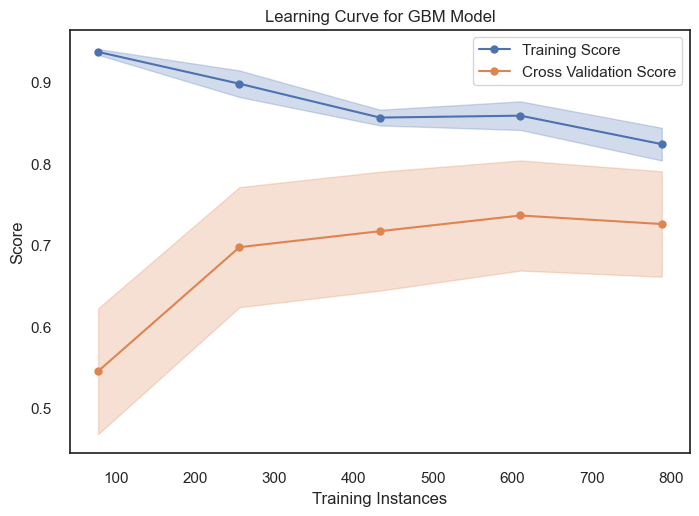

<Axes: title={'center': 'Learning Curve for GBM Model'}, xlabel='Training Instances', ylabel='Score'>

In [394]:
from yellowbrick.model_selection import learning_curve


visualizer = learning_curve(gbmodel,xsc,y,cv=5, scoring='r2', title="Learning Curve for GBM Model")

visualizer.show()

## Residuals plot + Q-Q plot (yellowbrick) for GBM model

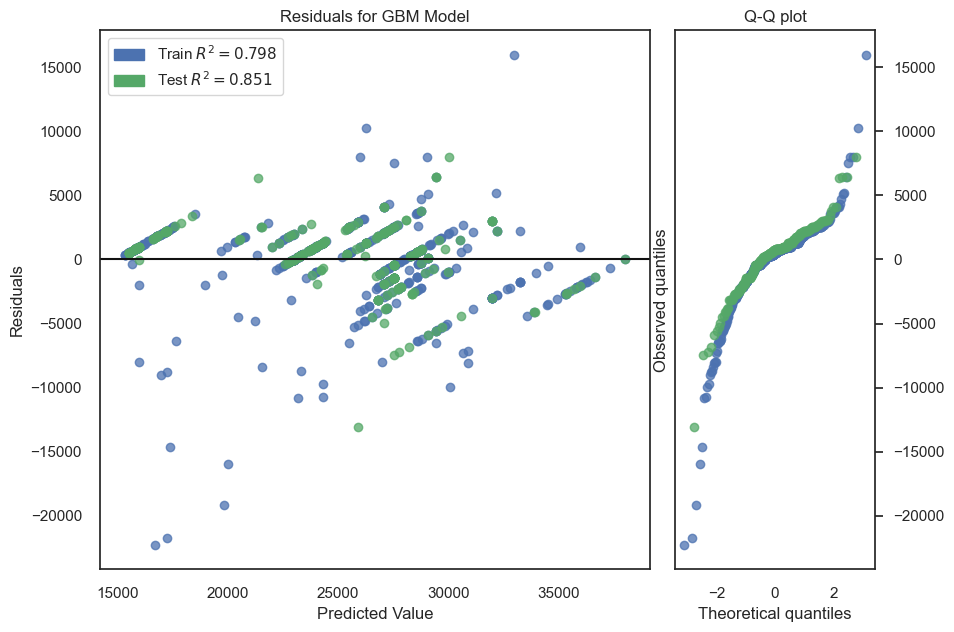

In [395]:
fig, ax = plt.subplots(figsize=(10, 7))
_ = residuals_plot(estimator=gbmodel,
                   is_fitted=True,
                   ax=ax,
                   X_train=xtrain,
                   y_train=ytrain,
                   X_test=xtest,
                   y_test=ytest,
                   hist=False,
                   qqplot=True,
                  title="Residuals for GBM Model"
                  )

## Prediction error plot (yellowbrick) for GBM model

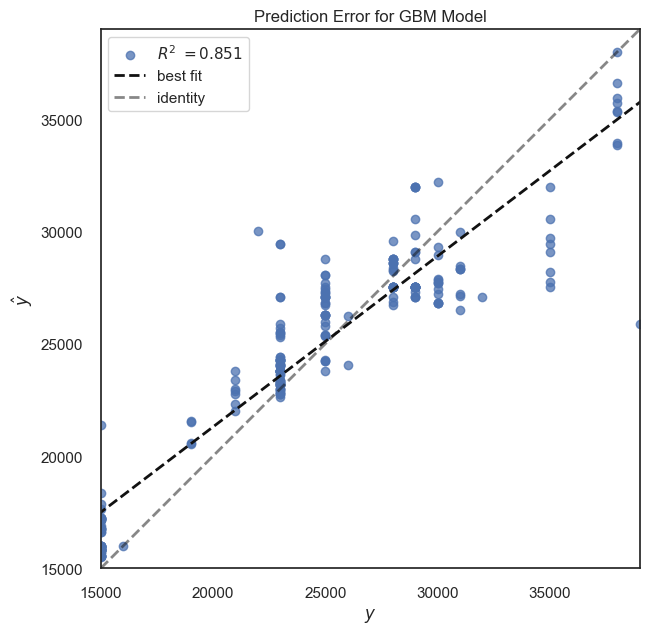

In [396]:
fig, ax = plt.subplots(figsize=(10, 7))
_ = prediction_error(estimator=gbmodel,
                     is_fitted=True,
                     ax=ax,
                     X_train=xtrain,
                     y_train=ytrain,
                     X_test=xtest,
                     y_test=ytest,
                     title="Prediction Error for GBM Model")

## SHAP Analysis for GBM model

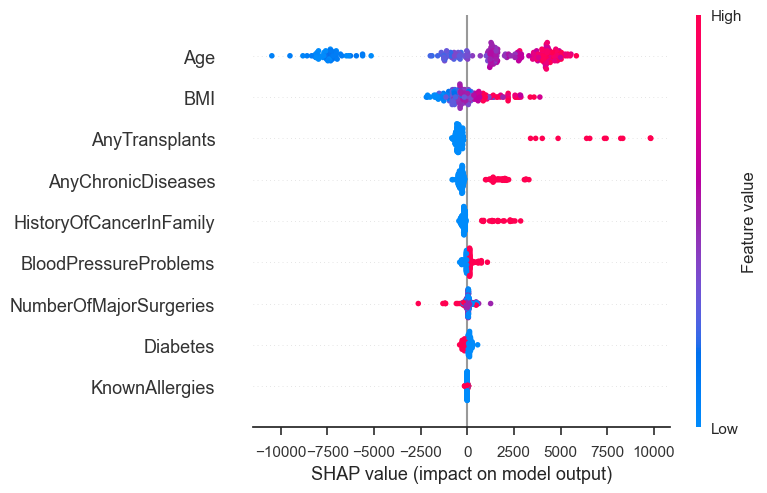

In [397]:
# Shap analysis for RF model
explainer2 = shap.TreeExplainer(gbmodel0)
GBM_shap_values = explainer2.shap_values(xtest)
shap.summary_plot(GBM_shap_values, xtest)

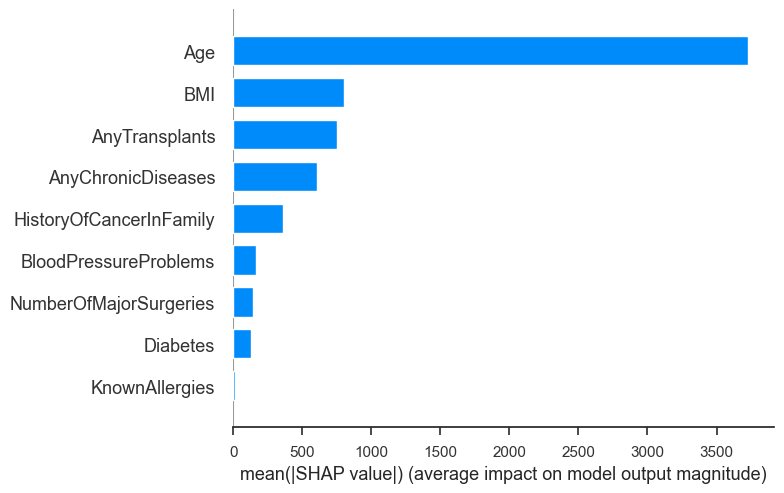

In [398]:
shap.summary_plot(GBM_shap_values, xtest, plot_type="bar")

## ICE plot for GBM Model

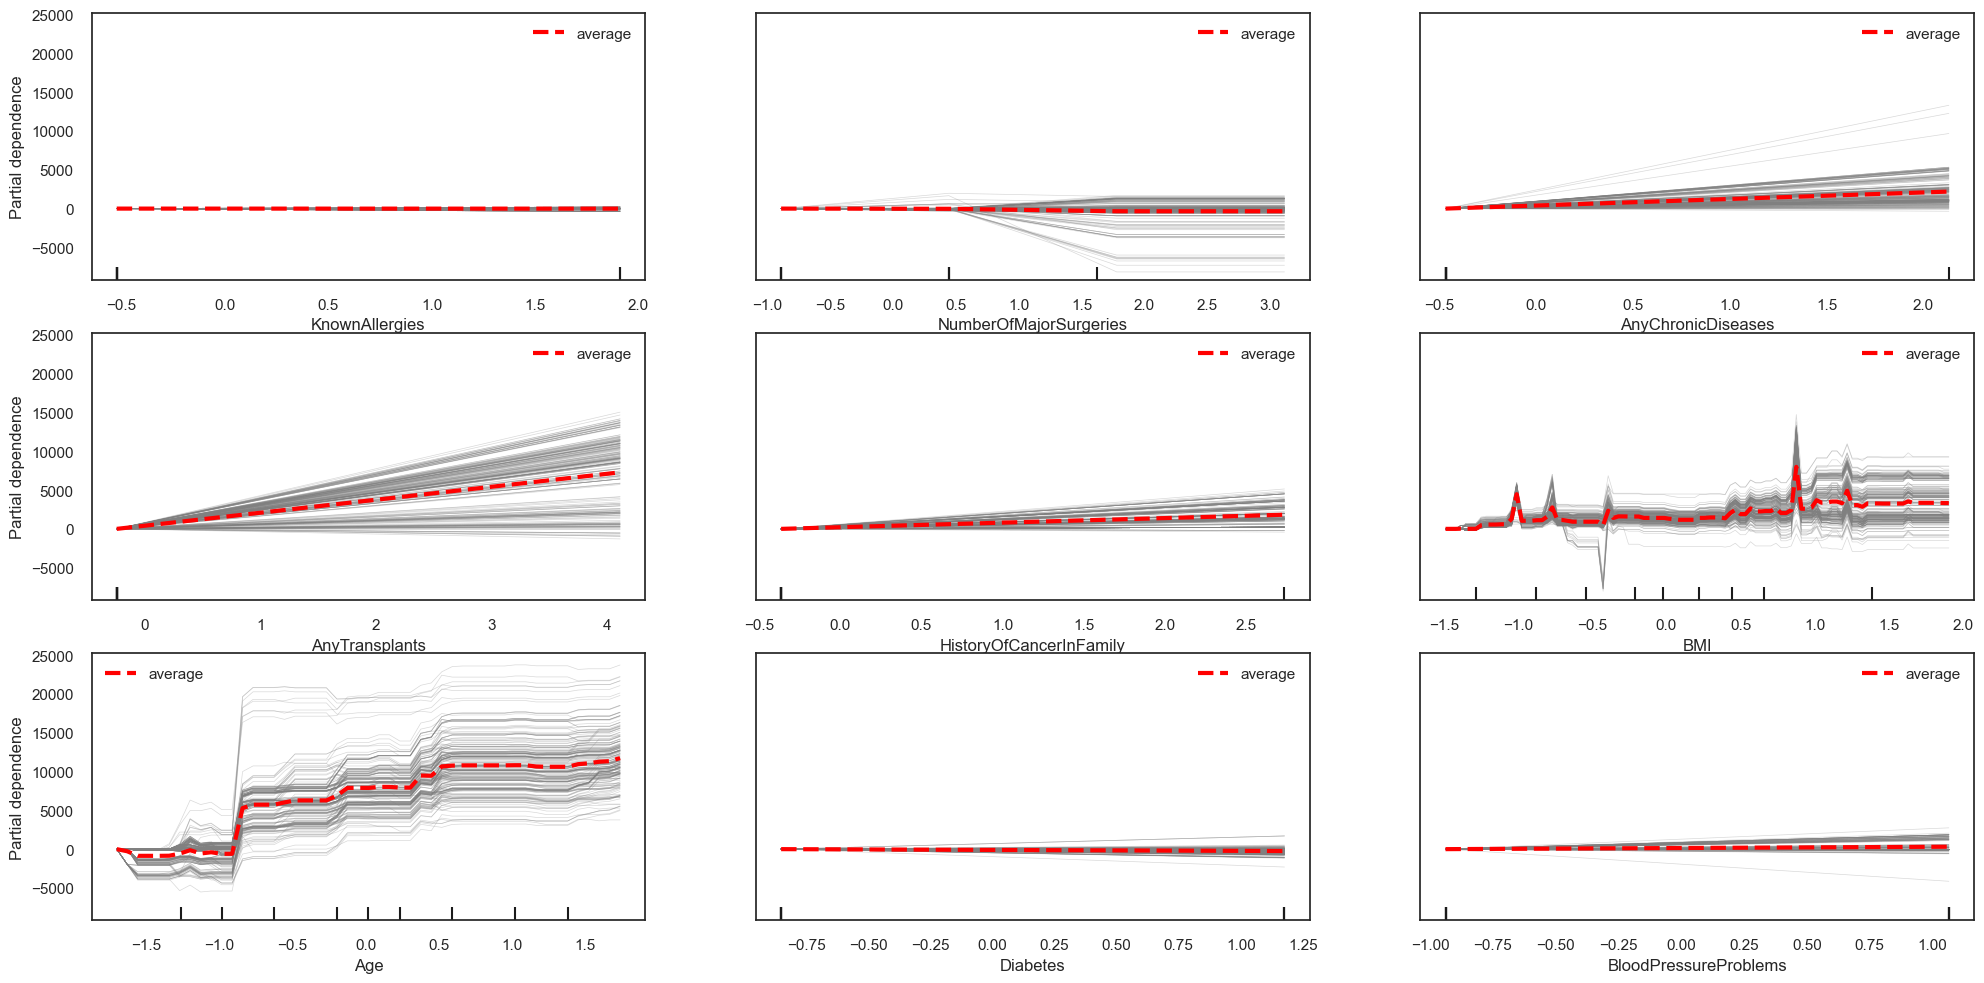

In [399]:
cols = xtest.columns
# Determine the 9 features with highest value for "feature importance" to draw the ICE plots.
included_features_indices = np.argpartition(gbmodel0.feature_importances_, -9)[-9:]

# Plot the ICE plots.
fig, ax = plt.subplots(figsize=(20, 10))
fig.set_tight_layout(True)  # Make sure labels of axes don't overlap in the final figure.
_ = PartialDependenceDisplay.from_estimator(estimator=gbmodel0,
                                            ax=ax,
                                            X=xtest,
                                            features=[i for i in included_features_indices],
                                            feature_names=cols,
                                            centered= True,
                                            n_cols=3,
                                            kind='both',
                                            ice_lines_kw={'color': 'gray'},
                                            pd_line_kw={'color': 'red', 'linewidth': 3, 'linestyle': 'dashed'})

# Final Result

In [400]:
models = pd.DataFrame({
    'Model': ['LR Model',  'RF Model', 'GBM Model'],
    'Train Score': [acc_lr_Train*100,  acc_RF_Train*100, acc_GBM_Train*100],
    'Test Score': [acc_lr_Test*100,  acc_RF_Test*100, acc_GBM_Test*100],
    'CV Score': [acc_lr_CV*100,  acc_RF_CV*100, acc_GBM_CV*100],


})
models.sort_values(by='Test Score', ascending=False)

,Model,Train Score,Test Score,CV Score
2,GBM Model,79.842,85.053,72.865
1,RF Model,95.797,84.291,73.467
0,LR Model,61.120,70.857,62.556


In [401]:
models = pd.DataFrame({
    'Model': ['RF Model', 'GBM Model'],
    'Train Score (R2)': [acc_RF_Train*100, acc_GBM_Train*100],
    'Test Score (R2)': [acc_RF_Test*100, acc_GBM_Test*100],
    'CV Score (R2)': [acc_RF_CV*100, acc_GBM_CV*100],
    'MAE Score': [MAE_RF_Test, MAE_GBM_Test],
    'RMSE Score': [RMSE_RF_Test, RMSE_GBM_Test],
    'MAPE Score (%)': [MAPE_RF_Test*100, MAPE_GBM_Test*100],
    'Elapsed Time (Sec)': [RF_elapsed_time, GBM_elapsed_time],
    'Memory Used (MB)': [RF_memory_used, GBM_memory_used],

})
models.sort_values(by='Test Score (R2)', ascending=False)

,Model,Train Score (R2),Test Score (R2),CV Score (R2),MAE Score,RMSE Score,MAPE Score (%),Elapsed Time (Sec),Memory Used (MB)
1,GBM Model,79.842,85.053,72.865,1712.390,2345.450,7.139,47.229,0.012
0,RF Model,95.797,84.291,73.467,1377.696,2404.543,5.806,39.980,7.477
